In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option("display.max_columns", 200)

In [2]:
def one_hot_encode(col_name, df):
    """
    One hot encode a string valued column in place.
    Drop one of the columns if no NaNs appear.
    """
    
    # one hot encode the columns
    encoded_cols = df[col_name].str.get_dummies()
    col = df[col_name]
    df.drop(columns=[col_name], inplace=True)
    
    # if there are no nans, drop one of the one-hots
    if col.isna().sum() == 0:
        for encoded_col in encoded_cols.columns[:-1]:
            new_col_name = col_name + '_' + encoded_col
            df[new_col_name] = encoded_cols[encoded_col] 
    else:
        for encoded_col in encoded_cols.columns:
            new_col_name = col_name + '_' + encoded_col
            df[new_col_name] = encoded_cols[encoded_col]         
        

In [13]:
# read in the training/test data
df = pd.concat( [pd.read_csv('train.csv', index_col='Id'), pd.read_csv('test.csv', index_col='Id')] )  

# remove unwanted string columns
unwanted_string_columns = [
    
    # This feature contains unrelated categories, that
    # would not make sense to one-hot encode or just 
    # split up
    'Fence', 
    
    # This feature also contains too many disparate
    # pieces of information
    'MiscFeature',
    
    # similar cases as above
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2'
    
]
df.drop(columns=unwanted_string_columns, inplace=True)  

# convert string data that has an inherent ordering to
# numerical values
quality_map = {
    "Ex": 2,   
    "Gd": 1,   
    "TA": 0,   
    "Fa": -1,   
    "Po": -2,
    
    # assume not having a thing is worse than having
    # a low quality version of that thing
    np.nan: -3 
}

quality_columns = [
    "KitchenQual", 
    "FireplaceQu", 
    "GarageQual", 
    "PoolQC", 
    "GarageCond", 
    "HeatingQC", 
    "BsmtCond", 
    "BsmtQual", 
    "ExterCond", 
    "ExterQual"
]
for col in quality_columns:
    df[col] = df[col].map(quality_map)

"""(i) Identify and handle missing data"""
# one hot encode remaining string columns, removing one column
# where there are no NaNs to preserve identifiability
string_columns = df.select_dtypes(include=['object']).columns.tolist()
[ one_hot_encode(col, df) for col in string_columns ]

"""(ii) Identify variables that have nonnumeric values that are misencoded as numbers"""
# a) delete the column if it has no value for the model (done)
# b) recode these variables as strings if it might be useful for a human

# MSSubClass, remove one of the columns if no nans
MSSubClass = {
    20  :"1-STORY 1946 & NEWER ALL STYLES",
    30  :"1-STORY 1945 & OLDER",
    40  :"1-STORY W/FINISHED ATTIC ALL AGES",
    45  :"1-1/2 STORY - UNFINISHED ALL AGES",
    50  :"1-1/2 STORY FINISHED ALL AGES",
    60  :"2-STORY 1946 & NEWER",
    70  :"2-STORY 1945 & OLDER",
    75  :"2-1/2 STORY ALL AGES",
    80  :"SPLIT OR MULTI-LEVEL",
    85  :"SPLIT FOYER",
    90  :"DUPLEX - ALL STYLES AND AGES",
    120 :" 1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150 :" 1-1/2 STORY PUD - ALL AGES",
    160 :" 2-STORY PUD - 1946 & NEWER",
    180 :" PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190 :" 2 FAMILY CONVERSION - ALL STYLES AND AGES"
}
df['MSSubClass'] = df['MSSubClass'].map(MSSubClass)

# c) one hot encode if it may be useful in regression 
# (done above when handline missing data)

# d) justify choice of one-hot encoding, deleting, or converting
# to strings. 
#     One-hot encoding MSSubClass would have greatly increased
#.    the dimensionality of our model, more than each factor
#.    would probably make up for with the information that it adds


"""
(iii) identify and one-hot encode any non-numerical categorical 
variables that need to be included in the regression model and delete
any categorical variables that you do not think need to be included.

Justify your choice of which to encode and which to delete."""
# explained above
"""
(iv) For each continuous variable, plot SalePrice as a function
of the variable. If the plot looks nonlinear, engineer an appropriate 
nonlinear feature to add to the dataframe (and give it a descriptive name).

Justify your choices.
"""
# First, replace categorical data with a continuous value
# where appropriate

continuous_cols = [
    # quality columns
    "KitchenQual", 
    "FireplaceQu", 
    "GarageQual", 
    "PoolQC", 
    "GarageCond", 
    "HeatingQC", 
    "BsmtCond", 
    "BsmtQual", 
    "ExterCond", 
    "ExterQual",
    
    # other
    '1stFlrSF',
    '2ndFlrSF',
    '3SsnPorch',
    'BedroomAbvGr',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtFullBath',
    'BsmtHalfBath',
    'BsmtUnfSF',
    'EnclosedPorch',
    'Fireplaces',
    'FullBath',
    'GarageArea',
    'GarageCars',
    'GarageYrBlt',
    'GrLivArea',
    'HalfBath',
    'KitchenAbvGr',
    'LotArea',
    'LotFrontage',
    'LowQualFinSF',
    'MasVnrArea',
    'MiscVal',
    'MoSold',
    'OpenPorchSF',
    'OverallCond',
    'OverallQual',
    'PoolArea',
    'ScreenPorch',
    'TotRmsAbvGrd',
    'TotalBsmtSF',
    'WoodDeckSF',
    'YearBuilt',
    'YearRemodAdd',
    'YrSold'
]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


### Plot SalePrice against all of our continuous variables

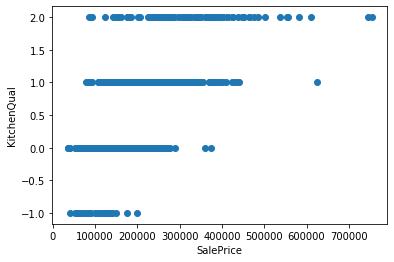

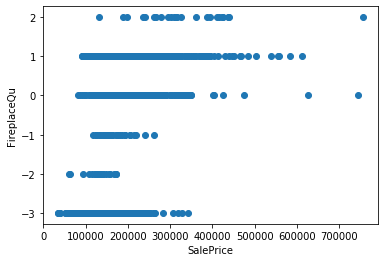

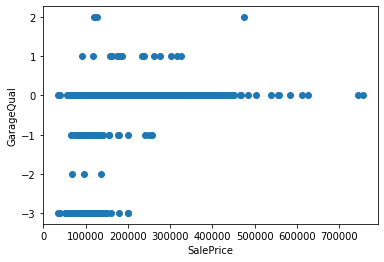

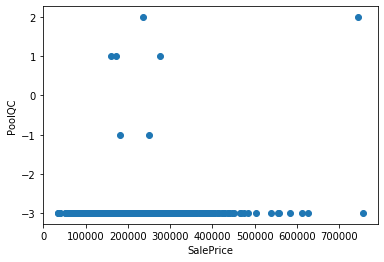

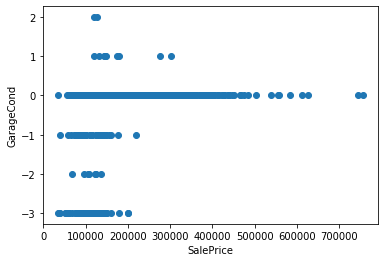

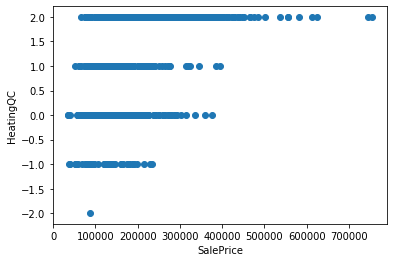

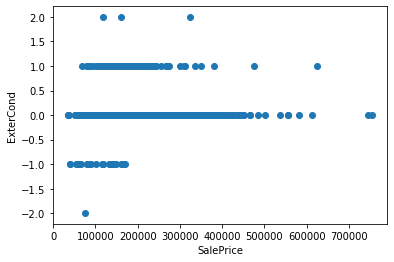

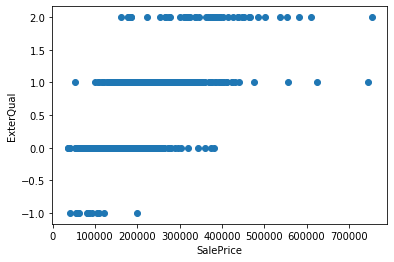

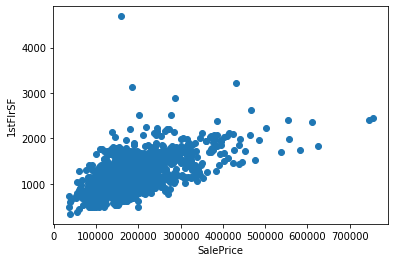

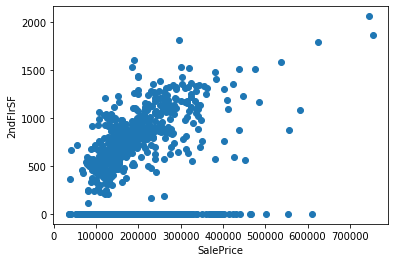

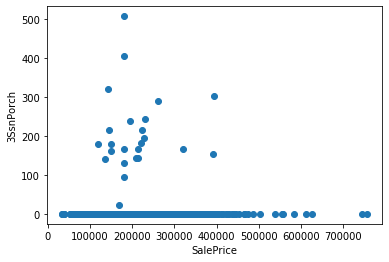

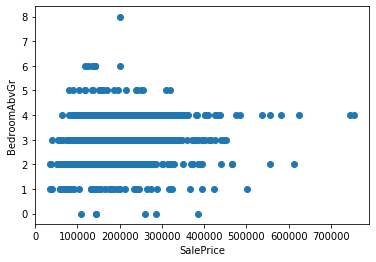

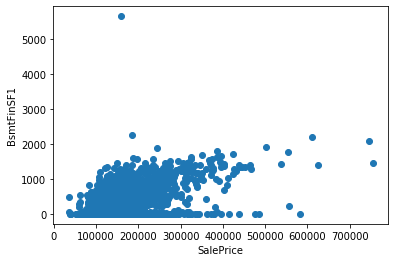

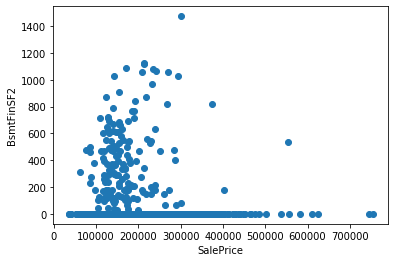

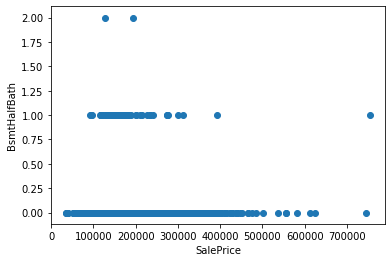

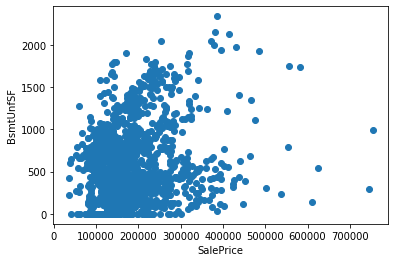

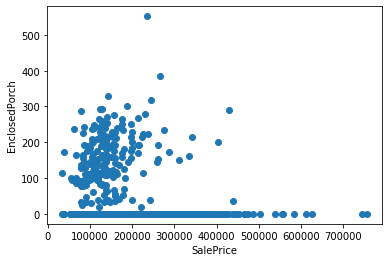

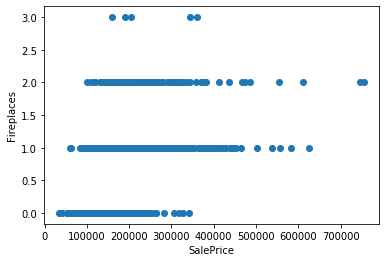

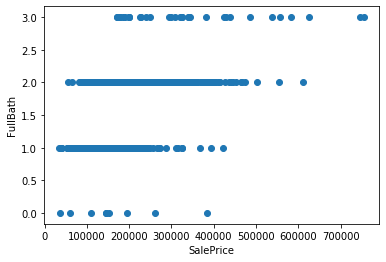

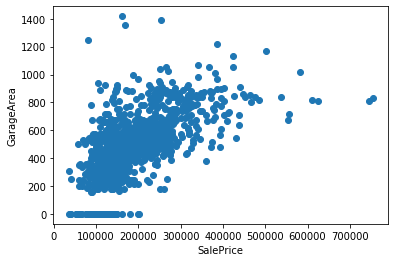

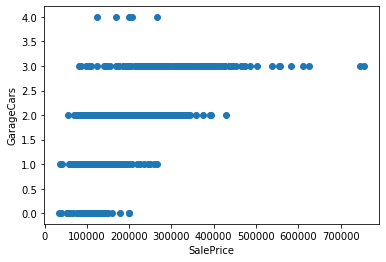

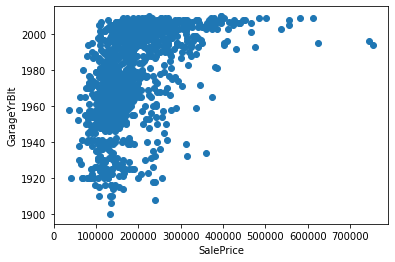

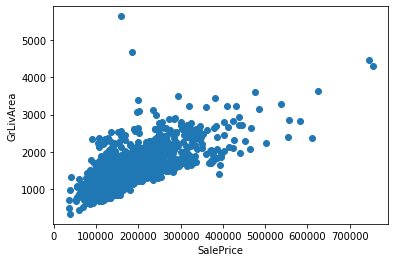

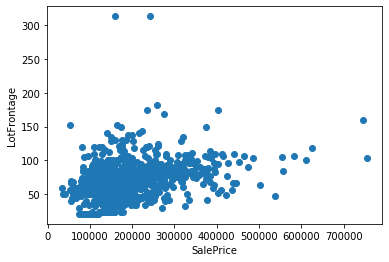

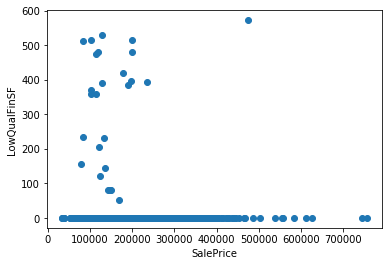

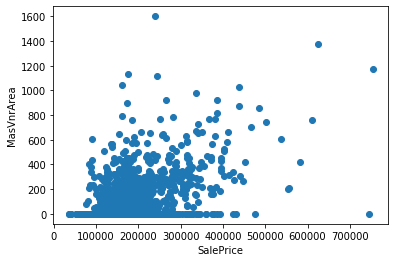

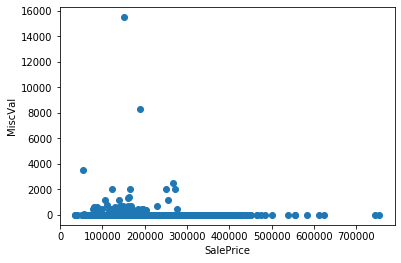

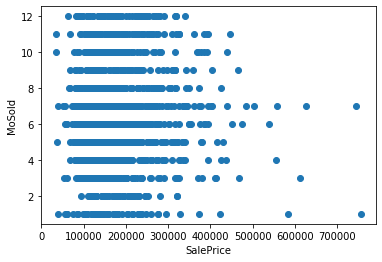

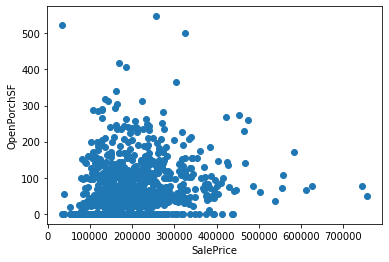

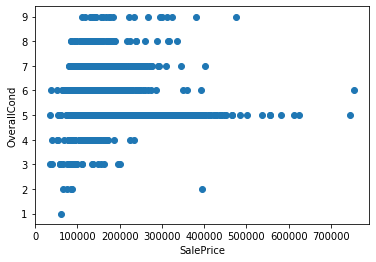

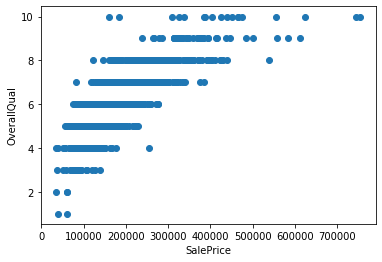

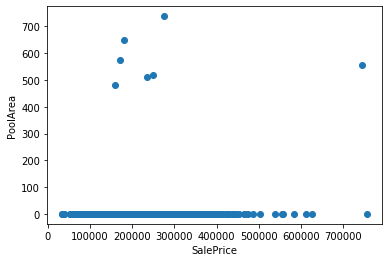

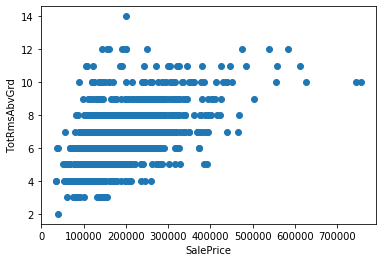

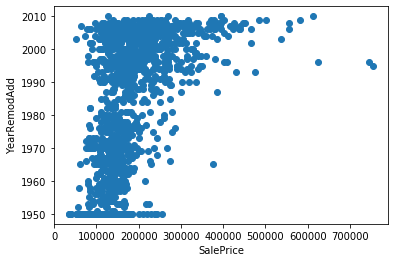

In [4]:
for col in continuous_cols:
    plt.scatter(df.SalePrice, df[col])
    plt.ylabel(col)
    plt.xlabel('SalePrice')
    plt.show()

In [5]:
"""(v) Find 3 sets of features to multiply, and find transform non linear relationships"""
# columns with sqrt relationship with SalePrice
# pairs to multiply
df['Quality_1st_floor_SF'] = df['OverallQual'] * df['1stFlrSF']
df['Total_Fireplace_Quality'] = df['FireplaceQu'] * df['Fireplaces']
df['Total_Quality_Garage'] = df['GarageArea'] * df['GarageQual']

quadratics = [
    "2ndFlrSF",
    "GarageArea",
    "GarageYrBlt",
    "OverallCond",
    "TotalBsmtSF",
    "YearBuilt",
    "YearRemodAdd",
    
    # custom
    'Quality_1st_floor_SF',
    'Total_Fireplace_Quality',
    'Total_Quality_Garage'
]

# square 'em
for col in quadratics:
    df[col] = df[col].apply(np.square)

"""(vi) add a constant column to the dataframe"""
df['y_int'] = 1

"""(vii) run an OLS on the data"""
df = df.select_dtypes(include=['int', 'float']).dropna()
X, y = df.drop(columns=['SalePrice']), df['SalePrice']
lin_reg = sm.OLS(y, X).fit()

def get_coef_table(lin_reg):
    ''' lin_reg is a fitted statsmodels regression model
    Return a dataframe containing coefficients, pvalues, and the confidence intervals
    '''
    err_series = lin_reg.params - lin_reg.conf_int()[0]
    coef_df = pd.DataFrame({'coef': lin_reg.params.values[1:],
                            'ci_err': err_series.values[1:],
                            'pvalue': lin_reg.pvalues.round(4).values[1:],
                            'varname': err_series.index.values[1:]
                           })
    return coef_df

results = get_coef_table(lin_reg)

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [10]:
results.coef = np.abs(results.coef)
sorted_results = results.sort_values('coef', ascending=False)

# top 3
sorted_results[:3]

coef         ci_err  pvalue           varname
182  983322.503575  159931.704602  0.0000  RoofMatl_ClyTile
63   306932.076667   58829.914605  0.0000   Condition2_PosN
184   66558.042293   87037.792177  0.1338  RoofMatl_Membran

### Top and Bottom 3 Largest Coefficients

In [11]:
# bottom 3
sorted_results[-3:]

coef        ci_err  pvalue           varname
112  4.873465e-11  4.199182e-09  0.9818    Functional_Sev
185  3.028402e-12  1.234308e-11  0.6303    RoofMatl_Metal
210  0.000000e+00  0.000000e+00     NaN  Utilities_NoSeWa

### One-hot Encode a string valued column

In [15]:
df.Alley.str.get_dummies().head()

AttributeError: 'DataFrame' object has no attribute 'Alley'

### Trick to see the dtypes and their distributions:

In [ ]:
# check distribution of dtypes
df.dtypes.value_counts()

### See a few actual columns and their dtypes

In [ ]:
df.dtypes[:4]

### Get only columns of a certain dtype

In [ ]:
df.select_dtypes(include=['float64', 'int64']).head()

### Replace values with a dict (values that are numbers 

In [ ]:
major_map = {856: 'math', 1262: 'history', 920: 'english'}
df['1stFlrSF'].head()

In [ ]:
df['1stFlrSF'].map(major_map).head()

### Parallelize the apply function
From the function applied, it infers whether the function can be vectorized, or just parallelized using dask.
See this blog post: https://towardsdatascience.com/one-word-of-code-to-stop-using-pandas-so-slowly-793e0a81343c

In [ ]:
! pip3 install swifter

In [ ]:
import swifter # this is killing the kernel
df['1stFlrSF'].swifter.apply(lambda x: str(x)) 

In [ ]:
df[eric_columns]
# FireplaceQu one-hot-encode
# Fireplaces  not missing any data, range of values looks good
# Foundation, no na values
# FullBath, all good (numeric)
# HalfBath, all good (numeric)
# Functional, 2 null values, one-hot-encode
# GarageArea, 1 null value, (numeric)
# GarageCars, 1 null value, (numeric)
# GarageCond, 159 null values, one-hot-encode
# GarageFinish, 159 null values, one-hot-encode
# GarageQual, one-hot-encode
# Fence Drop the column

col = 'GarageQual'
df[col].value_counts()
# df[col].isna().sum()


In [ ]:
df.SalePrice.isna().sum()

In [ ]:
len(df)